# Get started with the Sampler primitive

In this tutorial we will show you how to set up the Qiskit Runtime `Sampler` primitive, explore the different options you can use to configure it, and invoke the primitive efficiently inside a session.

## Primitives

_Primitives_ are meant to serve as foundational, elementary, building blocks for users to perform quantum computations, developers to implement quantum algorithms, and researchers to solve complex problems and deliver new applications.

## Using the Sampler primitive

Similar to the `Backend` base class, there is an `Sampler` base class defined in Qiskit Terra that standardizes the way users interact with all `Sampler` implementations.
This allows users to easily change their choice of simulator or device for performing expectation value calculations, even if the underlying implementation is different. 

In this section we will be using the default implementation in Qiskit Terra, which uses a local statevector simulator.

### Run an isolated experiment


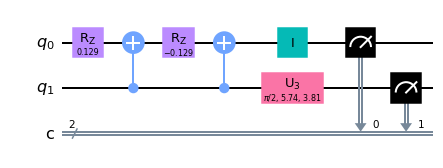

In [1]:
from qiskit.circuit.random import random_circuit
from qiskit.primitives import Sampler

circuit=random_circuit(2,2, seed=1).decompose(reps=1)
circuit.measure_all()

sampler = Sampler()
job = sampler.run(circuit)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Quasi probability distribution: {result.quasi_dists[0]}")
print(f" > Metadata: {result.metadata[0]}")

### Run experiment bundles


In [ ]:
from qiskit.circuit.random import random_circuit
from qiskit.primitives import Sampler

circuits = (
        random_circuit(2,2, seed=0).decompose(reps=1),
        random_circuit(2,2, seed=1).decompose(reps=1),
)
[c.measure_all()forcincircuits]

sampler = Sampler()
job = sampler.run(circuits)
result = job.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f" > Quasi probability distributions: {result.quasi_dists}")
print(f" > Metadata: {result.metadata}") 

### Input parameterized circuits

Many real world applications of quantum computers depend on preparing quantum states according to certain parametrization or _ansatz_. The Sampler primitive offers support for these scenarios by accepting parametrized circuits as inputs, along with one extra argument to bind them: `parameter_values`.

In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
circuit.measure_all()
parameter_values = [0, 1, 2, 3, 4, 5]

sampler = Sampler()
job = sampler.run(circuit, parameter_values)
result = job.result()

display(circuit.draw("mpl"))
print(f" > Parameter values: {parameter_values}")
print(f" > Quasi probability distributions: {result.quasi_dists[0]}")
print(f" > Metadata: {result.metadata[0]}") 

## Getting started with Sampler on the runtime service 

Follow the steps in the [getting started guide](../getting_started.rst) to get your quantum service instance ready to use.

## Start a session

A Qiskit Runtime session allows you to group a collection of iterative calls to the timeshare quantum computer. A session is started when the first job of the program is dequeued. Subsequent jobs within the session are prioritized by the scheduler to minimize artificial delay within an iterative algorithm. Data used within a session, such as transpiled circuits, is also cached to avoid unnecessary overhead. You can create a Runtime session using the context manager `(with ...:)`, which automatically opens and closes the session for you.

    with Session(service) as session:
        sampler = Sampler(session=session, options=options) #primitive constructor
	     sampler.run(circuit, parameters, observable) #job call

### Create a Sampler instance

You can make one or more calls to the Sampler primitive within a session, by first creating a _Sampler_ instance. The _Sampler_ class takes in an _options_ variable to control the execution environment.

The _options_ can be either a dictionary or a _qiskit_ibm_runtime.Options_ class instance. Initializing it as an _Options_ class allows you to use auto complete.

Some of the settings you can specify using options:

* optimization_level: How much optimization to perform on the circuits. The default is 3.

* resilience_level: How much resilience to build against errors. Higher levels generate more accurate results, at the expense of longer processing times. The default is 1.

You can find full details in the [Options API reference](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.options.Options.html#qiskit_ibm_runtime.options.Options).

With these arguments, you can create an _Sampler_ instance with the desired options. 

#### Example:



In [ ]:
    from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Options

    service = QiskitRuntimeService()
    options = Options(optimization_level=3)

    with Session(service=service, backend="ibmq_qasm_simulator"):
        sampler = Sampler(options=options)